# III. Question

## Nội dung

###  Asset Turnover Ratio là một trong những chỉ số để đánh giá sự hiệu quả sử dụng tài sản cũng như hiệu quả kinh doanh của doanh nghiệp. Vậy ta có nên dùng chỉ số này để so sánh các công ty thuộc các lĩnh vực khác nhau hay không ?

## Mục đích:
 Mục đích của việc này là là để hiểu rõ hơn về chỉ số ATR và cách sử dụng nó. 
 
Cụ thể, mục đích của việc này bao gồm:
- Hiểu rõ hơn về những yếu tố ảnh hưởng đến Asset Turnover Ratio của các lĩnh vực.
- Biết được khi nào thì nên sử dụng ATR để so sánh các công ty thuộc các lĩnh vực khác nhau.
- Tránh được những so sánh không chính xác, dẫn đến những quyết định đầu tư sai lầm.

## Import các thư viện cần thiết

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import re

## Load dataset đã được tạo

In [2]:
companies_df = pd.read_csv("../Data/preprocessed/cleaned_dataset.csv")

1. Tính toán Asset Turnover Ratio cho từng dòng

`Asset Turnover (Vòng quay tài sản) = Revenue (Doanh thu) / Total Assets (Tổng tài sản)`   
Vòng quay tổng tài sản hay được gọi là Asset Turnover Ratio, đây là một chỉ số tài chính, thước đo đánh giá hiệu quả sử dụng tài sản của một doanh nghiệp. Chỉ số này thể hiện việc sử dụng tài sản của công ty cho mục đích kinh doanh hiệu quả đến đâu.

In [3]:
companies_df['ATR'] = companies_df['Revenue ($B)'] / companies_df['Total Assets ($B)']

In [4]:
companies_df.sample(5)

,Company,Year,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B),Country,Share price ($),Categories,ATR
4045,Fiserv,2003,1.93500,0.510,3.03,7.68,0.83,2.19,7.21,0.20,USA,132.36,"Financial services, Tech",0.420250
37445,Sino Biopharmaceutical,2022,0.02124,0.800,3.50,11.10,2.02,5.50,9.28,2.45,China,0.43,Pharmaceuticals,0.377155
22369,George Weston,2010,3.06000,1.060,31.15,10.87,6.20,8.73,20.86,4.76,Canada,118.88,Food,1.493289
19386,Centrais Electricas Brasileiras,2003,0.56500,1.715,11.29,10.11,14.09,21.41,54.49,4.46,Brazil,8.34,"Electricity, Utility companies, Energy",0.207194
25050,Fox Corporation,2020,2.54000,2.120,12.66,17.27,7.94,10.41,21.75,4.64,USA,28.01,MediaPress,0.582069


2. Tìm ra danh sách các lĩnh vực

In [5]:
all_categories = []

for categories_str in companies_df['Categories']:
    categories = categories_str.split(', ')  
    all_categories.extend(categories)  
    

unique_categories = list(set(all_categories))
print("Số lĩnh vực là:", len(unique_categories))

Số lĩnh vực là: 132


In [6]:
category_ATR = {}


for category in unique_categories:
    category_data = companies_df[companies_df['Categories'].str.contains(category, na=False)]    
    # Tính trung vị ATR cho category 
    category_ATR[category] = category_data['ATR'].median()



3. Vẽ biểu đồ biểu diễn 20 lĩnh vực có chỉ sô ART cao nhất

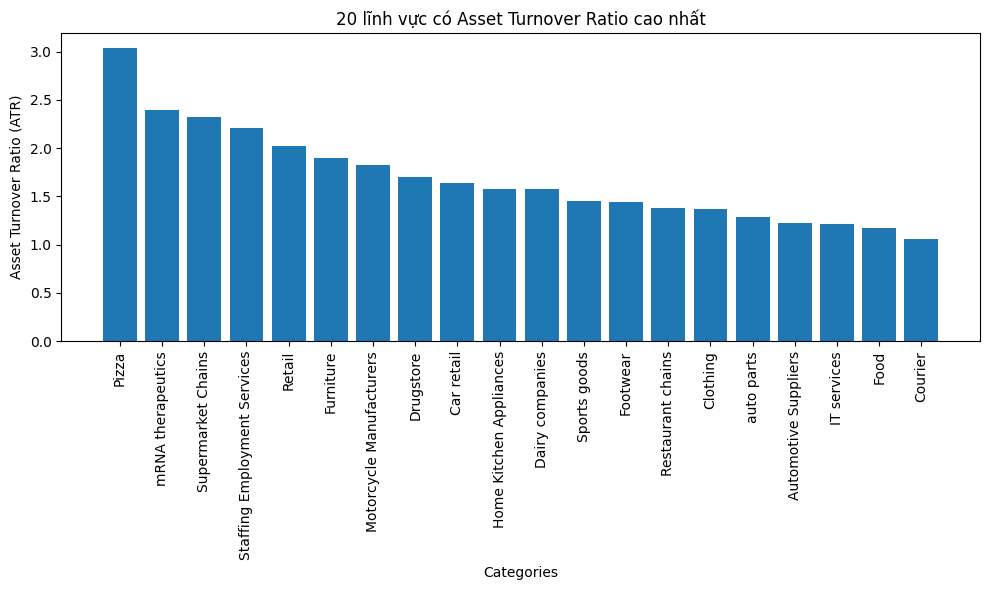

In [7]:
# Tạo biểu đồ bar chart cho top 10 categories với giá trị ATR tương ứng
top_categories = sorted(category_ATR, key=category_ATR.get, reverse=True)[:20]  
plt.figure(figsize=(10, 6))
plt.bar(top_categories, [category_ATR[cat] for cat in top_categories])
plt.xlabel('Categories')
plt.ylabel('Asset Turnover Ratio (ATR)')
plt.title('20 lĩnh vực có Asset Turnover Ratio cao nhất')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Nhận xét: 
- Đa phần các lĩnh vực nằm trong nhóm dịch vụ hoặc bán lẻ. 
- Dịch vụ (Courier, Staffing Employment Services, IT Service,...): Các ngành dịch vụ thường có chi phí đầu tư ban đầu thấp và dựa vào nguồn nhân lực, cho phép họ tạo ra doanh thu cao từ tài sản tương đối nhỏ.
- Bán lẻ (Retail): Do nhu cầu mua sắm của người dân ngày càng tăng, lĩnh vực bán lẻ thường có doanh thu cao. Ngoài ra, các công ty bán lẻ thường có cấu trúc tài sản đơn giản, với ít tài sản cố định. Do đó, ATR của các công ty bán lẻ thường cao.
- Lĩnh vực thức phẩm và hàng tiêu dùng (Sports goods, Footwear, Home Kitchen Appliances ):nhu cầu ổn định, có chu kỳ kinh doanh ngắn, chỉ từ vài ngày đến vài tháng. Điều này giúp doanh nghiệp trong lĩnh vực thu hồi vốn nhanh chóng, từ đó cải thiện tỷ suất lợi nhuận.


- Các lĩnh vực trong danh sách đều có điểm chung là nhu cầu tiêu dùng cao, sử dụng nhiều nhân lực. Điều này dẫn đến doanh thu lớn và chu kỳ kinh doanh ngắn.

4. Vẽ biểu đồ biểu diễn 20 lĩnh vực có chỉ sô ART thấp nhất

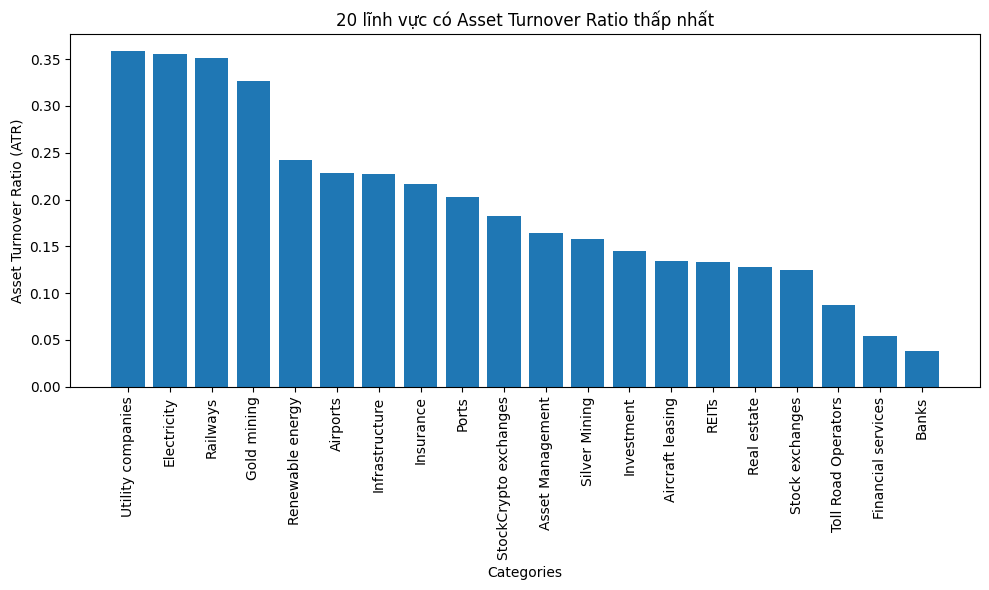

In [8]:
bottom_categories = sorted(category_ATR, key=category_ATR.get, reverse=True)[-20:]  

plt.figure(figsize=(10, 6))
plt.bar(bottom_categories, [category_ATR[cat] for cat in bottom_categories])
plt.xlabel('Categories')
plt.ylabel('Asset Turnover Ratio (ATR)')
plt.title('20 lĩnh vực có Asset Turnover Ratio thấp nhất')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Ta có thể chia các lĩnh vực có ART thấp thành các nhóm:
- Nhóm tài sản cố định lớn:
  - Liên quan đến cơ sở hạ tầng (Utility companies, Electricity, Railways, Airports, Infrastructure, Ports): Các lĩnh vực này thường có cơ sở hạ tầng lớn, đòi hỏi đầu tư ban đầu cao. Doanh thu có thể ổn định nhưng tăng trưởng chậm, dẫn đến ATR thấp.
  - Khai thác (Gold mining, Silver Mining): Cần đầu tư vào hệ thống khai thác, chế biến, mất thời gian thu hồi vốn, do đó ATR thấp.
 - Nhóm chu kỳ kinh doanh dài:
   - Năng lượng tái tạo (Renewable energy): Các dự án năng lượng tái tạo thường đòi hỏi vốn đầu tư lớn ban đầu và thời gian hoàn vốn dài, dẫn đến ATR thấp.
   - Lĩnh vực liên quan đến bất động sản (Real estate, REITS): Bất động sản có đặc điểm là tài sản lớn, thời gian giao dịch mua bán lâu, do đó ATR thường thấp.
 - Nhóm lĩnh vực tài chính:
   - Financial services, Banks: sở hữu một số tài sản lớn nhưng các tài sản này không được sử dụng trực tiếp để tạo ra doanh thu mà thường được sử dụng để đảm bảo tính thanh khoản và đáp ứng yêu cầu quy định.
   - Investment, Asset Management: Quản lý đầu tư tập trung vào lợi nhuận dài hạn, ATR trong ngắn hạn có thể thấp.

#### Nhận xét chung
- Có sự khác biệt lớn về ART giữa 2 nhóm.
- Chỉ số ART của 20 nhóm cao nhất đều trên 1.
- Chỉ số ART của 20 nhóm thấp nhất đều dưới 1.

#### Vậy ta có nên sử dụng chỉ số ART để so sánh các công ty thuộc lĩnh vực khác nhau ?
- Không nên dùng chỉ số ATR để so sánh các công ty thuộc các lĩnh vực khác nhau, do sự khắc biệt của các lĩnh vực. Các ngành nghề khác nhau có đặc điểm kinh doanh khác nhau. Ví dụ, các ngành dịch vụ thường có chi phí tài sản cố định thấp hơn các ngành tài chính, bất động sản. Điều này dẫn đến tỷ suất doanh thu trên tài sản (ATR) của các công ty dịch vụ thường cao hơn các công ty tài chính, bất động sản.
- Các ngành nghề khác nhau có đặc điểm kinh doanh khác nhau, dẫn đến chi phí đầu tư, cấu trúc tài sản, chu kỳ kinh doanh,... khác nhau. Điều này ảnh hưởng đến chỉ số ART của doanh nghiệp. Do đó, việc so sánh chỉ số ART của các công ty thuộc các lĩnh vực khác nhau là không chính xác.

#### Vậy những ngành có chỉ số ART thấp hơn các ngành khác có nghĩa là ngành đó sinh lời kém hơn  ?
- Không hẳn như vậy. Chỉ số ART là một chỉ số tài chính phản ánh hiệu quả sử dụng tài sản của doanh nghiệp. Tuy nhiên, hiệu quả sử dụng tài sản chỉ là một khía cạnh của hiệu quả hoạt động của doanh nghiệp. 
- Nhìn vào biểu đồ, có vẻ như các lĩnh vực có ATR cao thường có biên độ lợi nhuận thấp, còn các lĩnh vực có ATR thấp thường có biên độ lợi nhuận cao.

Ta sẽ chứng minh điều này thông qua Earning Margin

1. Tính earning margin
`Earnings margin` là tỷ số giữa lợi nhuận và doanh thu. Chỉ số này phản ánh hiệu quả sử dụng doanh thu của một công ty.

Các công ty có earnings margin cao thường có hiệu quả sử dụng doanh thu tốt, có thể tạo ra lợi nhuận cao hơn trên mỗi đơn vị doanh thu.

In [9]:
companies_df['Earnings Margin'] = (companies_df['Earnings ($B)'] / companies_df['Revenue ($B)']) * 100
companies_df.sample(5)

,Company,Year,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B),Country,Share price ($),Categories,ATR,Earnings Margin
6312,Humana,2013,7.78000,2.0600,41.31,15.89,3.00000,9.31,20.73,9.22000,USA,481.62,Insurance,1.992764,4.986686
35915,Rakuten,2011,-0.06473,-0.1400,4.79,13.96,4.50000,3.05,24.85,2.14000,Japan,4.02,"ECommerce, Internet, Tech",0.192757,-2.922756
8854,IDEXX Laboratories,2001,0.28000,0.0617,0.38,0.96,0.00838,0.30,0.37,0.07955,USA,531.35,Diagnostics and Testing,1.027027,16.236842
31089,Recordati,2007,1.28000,0.3600,1.29,1.75,0.26000,0.57,1.10,0.19000,Italy,50.40,"Pharmaceuticals, Biotech",1.172727,27.906977
10003,TC Energy,2002,1.14000,6.5000,3.88,6.95,8.20000,5.00,14.64,0.58000,Canada,38.01,"OilGas, Transportation, Energy, Infrastructure",0.265027,167.525773


In [10]:
category_EM = {}
for category in unique_categories:
    
    category_data = companies_df[companies_df['Categories'].str.contains(category, na=False)]
    # Tính trung vị cho category 
    category_EM[category] = category_data['Earnings Margin'].median()


2. Vẽ biểu đồ để so sánh margin earnings giữa hai nhóm có chỉ số ART cao nhất và thấp nhất

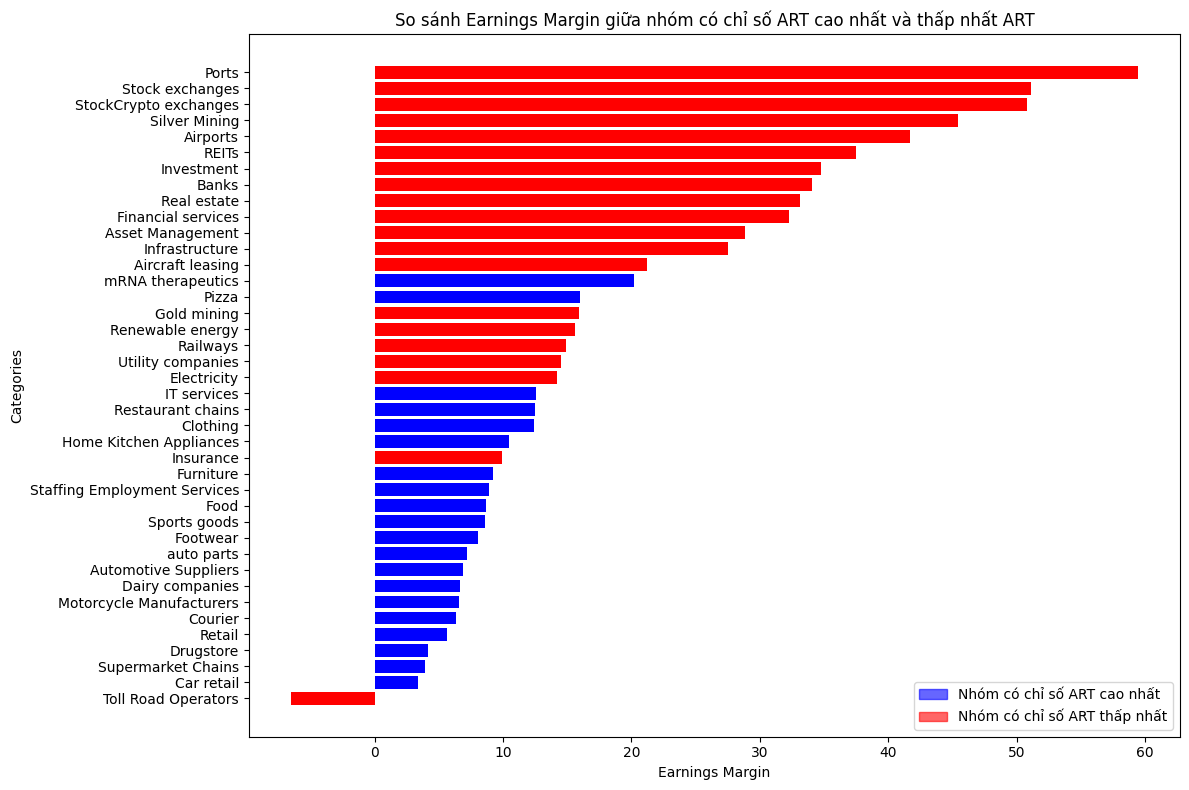

In [11]:

all_categories = top_categories + bottom_categories
all_earnings_margin_em = [category_EM[cat] for cat in all_categories]

sorted_categories = [x for _, x in sorted(zip(all_earnings_margin_em, all_categories), reverse=True)]
sorted_earnings_margin_em = sorted(all_earnings_margin_em, reverse=True)
category_colors = ['blue' if category in top_categories else 'red' for category in sorted_categories]

plt.figure(figsize=(12, 8))
plt.barh(sorted_categories, sorted_earnings_margin_em, color=category_colors)

plt.xlabel('Earnings Margin')
plt.ylabel('Categories')
plt.title('So sánh Earnings Margin giữa nhóm có chỉ số ART cao nhất và thấp nhất ART')



handles = [plt.Rectangle((0,0),1,1, color='blue', alpha=0.6), plt.Rectangle((0,0),1,1, color='red', alpha=0.6)]
labels = ['Nhóm có chỉ số ART cao nhất', 'Nhóm có chỉ số ART thấp nhất']
plt.legend(handles, labels)

plt.gca().invert_yaxis() 
plt.tight_layout()
plt.show()


Nhận xét:
- Đúng như dự đoán, những lĩnh vực có chỉ số ART cao thường có Margin Earning nhỏ hơn.

### Kết luận
- Chỉ số ATR phản ánh sự hiệu quả sử dụng tài sản của một công ty. Tuy nhiên các ngành nghề khác nhau có đặc điểm kinh doanh khác nhau, dẫn đến chi phí đầu tư, cấu trúc tài sản, chu kỳ kinh doanh,... khác nhau. Điều này ảnh hưởng đến chỉ số ART của doanh nghiệp. Do đó, việc so sánh chỉ số ART của các công ty thuộc các lĩnh vực khác nhau là không chính xác.
- Việc so sánh các công ty thuộc các lĩnh vực khác nhau là một quá trình phức tạp và cần phải xem xét nhiều yếu tố khác nhau.